# Chapter 4 다양한 분류 알고리즘

학습목표 :  
- 로지스틱 회귀, 확률적 경사 하강법과 같은 분류 알고리즘을 배움
- 이진 분류와 다중 분류의 차이를 이해하고 클래스별 확률을 예측

## 4-2 확률적 경사 하강법

- 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배움

### 점진적인 학습
점진적 학습 알고리즘 -> 확률적 경사 하강법(Stochastic Gradient Descent)

#### 확률적 경사 하강법
'확률적' = 무작위하게 or 랜덤하게

- 확률적 경사 하강법 : 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것
- 에포크 (epoch) : 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행
- 미니배치 경사 하강법 (minibatch gradient descent) : 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식 
- 배치 경사 하강법 (batch gradient descent) : 전체 샘플을 사용해 경사 하강법 수행

#### 손실함수 (loss function)
머신러닝 알고리즘 판단 기준. 작으면 작을 수록 좋다고 판단  
미분 가능 해야함!

#### 로지스틱 손실 함수(logistic loss function)
- =이진 크로스엔트로피 손실함수 (binary cross-entropy loss function)이라고도 함
- 다중분류도 비슷한 손실함수를 사용 cross-entropy loss function(크로스 엔트로피 손실함수)

### SGDClassifier

In [2]:
import pandas as pd
fish=pd.read_csv("https://bit.ly/fish_csv_data")
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/Users/seokjinchoi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [9]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7815126050420168
0.8


In [10]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

In [11]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

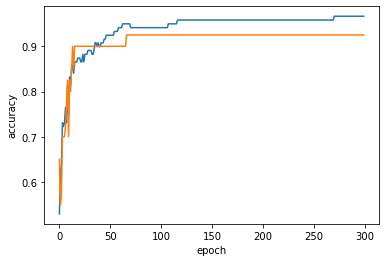

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
   

In [13]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
sc=